# COGS 118A - Final Project

# Logistic Regression and Adaboost Classification On Credit Card Defaulting

## Group members

- Angel Olivas

- Hyunseo Park

- Yuanzhen Zhu

- Eric Dong

# Abstract 
This paper aims to research and understand the possibility of looking at how one can use machine learning models to analyze and predict whether or not a credit card will default. Defaulting on credit card payments occurs when individuals repeatedly fail to pay their bills, leading to account closure and negative marks on their credit history. The consequences of defaulting are severe and can create problems for both lenders and borrowers. Thus, the goal is to figure out when a credit card bill would default to either prevent or notify both parties from dealing with potential consequences. The study utilizes a dataset from Taiwan, encompassing various client statistics such as credit accumulation, payment history, billing amounts, and more. By analyzing the data of around 30,000 clients, the research investigates the relationship between these factors and credit cards defaulting. We used different cleaning and data manipulation methods such as Z-scoring, One-hot encoding and Min-Max standardization, to extract meaningful insights and patterns from the dataset. Our goal is to build a machine learning model to predict debt default by classification. For our machine learning model, we decided to fit logistic regression and Adaboost model. It allows for the estimation of the probability of credit cards defaulting based on the identified factors. To compare our two models and evaluate possible future performance, we have utilized different metrics in confusion matrix and plotted AUC-ROC curves, with a specific focus on minimizing the false positive rate because of its potential large damage in prediction. The results show that we have succeeded in obtaining a low FP rate in both models, and we achieved an Accuracy of around 80% in both models, with Adaboost winning by a small margin. The two models didn't have very different performance might be due to underfitting of our datasets.

# Background

Understanding and preventing defaulting on credit card loans is an issue that is very vital in dealing with financial risk management. In allowing the credit card account to be closed due to unpaid charges, credit histories are ruined and financial burdens and stresses are exponentially increased. There are required debts to be paid and any mortgage, student, or auto loans will also take a hit or be increased. The burden on the loaner increases, and they might resort to harsher tactics as time passes.<a name="Akinnote"></a>[<sup>[1]</sup>](#Akin) <br><br>
In economic models, certain relationships between variables, known as "stylized facts," can provide valuable insights into the behavior of credit card default. The process of creating such models often rely on broad trends that are quantified into aggregate satistics into how resources are distributed and flow in a society. However there are times where fundamental relationships between variables tend to be skewed one way or the other based on external factors leading to some confusion and investigation, these "stylized facts" that are essentially just understood relationships that inform us as to what is happening in a system. An example of this would be the relationship between interest rates and investments, which would be that as interest rates goes down, generally speaking investments go up.<a name="Ouliarisnote"></a>[<sup>[2]</sup>](#Ouliaris) One of the most famous example of this being prior to the 2008 financial crisis in United States, as interest rates decreased more people got into real estate that didn't have the capital to be doing so. This eventually lead to a bust because irresponsible lending to these creditors became rampant. But it also isn't unheard of for investments to decrease as interest rates go down, for example in Japan in the 1990's there was a period of uncertainty in the economy that created economic behaviour that needed to be stopped.<a name="Neilsennote"></a>[<sup>[3]</sup>](#Neilsen,) When this is the case, it is important to look at smaller scale models to figure diagonse what is causing odd behaviour, and though it would be ideal to make classifier models that properly reflect the real world, often times predictive models are needed to gain insight to build classifier models. We aim to help create one of these smaller scale models for Taiwan as it's within our ability with the dataset we have, using data found in debt collection and payment history and monthly income level. The choice of our features is partially informed by both historical and newer models for consumer default risk,<a name="CostaeSilvanote"></a>[<sup>[4]</sup>](#CostaeSilva,) and aims to create a smaller model for analysis for tracking debt in Taiwan. Ultimately, our goal is to enhance risk assessment practices, facilitate early detection of defaulting behaviors, and foster financial stability in the credit card industry. <br><br>
Previous work in this field has been done, such as various studies done by in Malaysia<a name="Sayjadahnote"></a>[<sup>[5]</sup>](#Sayjadah,), India<a name="Mahmudinote"></a>[<sup>[6]</sup>](#Mahmudi,), and UCLA<a name="Guinote"></a>[<sup>[7]</sup>](#Gui), all looking at using Machine Learning to predict credit card defaults. All three studies were conclusive, using varying machine learning techniques and finding which ones concluded with high precision rates, including random forest, XGBoost, and AdaBoost. These replicable studies show the application of machine learning models, highlighting their effectiveness in alleviating financial management burdens. By utilizing advanced techniques and analyzing relevant datasets, researchers have successfully developed models that provide conclusive insights into credit card default prediction. The findings from these studies serve as valuable references for our research, indicating that machine learning can yield robust models and contribute to improved financial decision-making. By leveraging the knowledge gained from previous studies, we aim to further investigate and build upon these findings. Our objective is to build successful models, contributing to research and providing insight for banks and clients dealing with credit card defaults.

# Problem Statement

The problem that we are aiming to solve is a classification prediction on whether or not a certain client's credit card would default given different variables and factors. Some very useful information that we could use to create a model to predict a client's possibility to default - which is very clearly just a Yes or No. Some potential solutions that we were looking at given that the result is a binary classification of either positive or negative are either looking at Logistic Regression models or maybe even a Suport Vector Machine. Given our dataset, we have around 30 thousand clients to work with and approximately 23 explanatory variables that are chunked into around eight parts. However, the result of the problem should be entirely binary, a positive or negative stat as to whether or not the credit card account would default. All the explantory variables are measurable as the data is essentially just data about the clients and their credit history. In addition, the entire problem would be replicable as we can continue looking at different datasets and training our model based off of those, predicting whether or not certain credit card accounts would default.

# Data

- Link to our dataset https://www.kaggle.com/datasets/utkarshx27/default-of-credit-card-clients-dataset

- Dataset name: 'Predict Credit Card Defaulters'

- The original dataset contains 25 columns/variables, and 30001 total observations

- An observation consists of 24 columns of X variables that in different degrees might relates to whether someone will default, and one y variable default payment (Yes = 1, No = 0) which is the classification of the observation

- Some critical variables potentially include Amount of credit given, Education, Marital status, Age, History of past payment. Amount of credit given and Age are represented in continuous natural numbers, Education and Marital status are represented categorically by natural numbers, History of past payment is represented monthly across multiple columns with each column denoting number of months that the payment has been late with discrete numbers (-1 ~ 9)

- Cleaning: This dataset don't have empty/null entries. There are 0 values in Education, Marial status variables however, We decided to combine those entries into others categories. We trimmed the first row of data to match variables.
  Transformation: We Z-scored Past payment, and then transformed Amount of bill statement & Amount of previous payment by taking the Mean of (Amount of bill statement - Amount of previous payment) and Z-scored it. We then One-hot encoded categorical datas like Sex, Education and Marriage.

# Proposed Solution

Our solution aims to make features of data found in the columns for credit given, repayment status, amount of bills, education, and amount paid per month, to make binary predictions on whether a data entry will default. The benchmark models that previous study(Reference #7) before us have compared are Adaboost and Gradient boosting. <br>
As for the our proposed solution, we will first be fitting logistic regression model which calculates probability for different data points' predicted outcomes, and makes linear classification based on minimizing a log loss of these probabilities. We chose logistic regression model because it's widely used and recognized on doing binary classification problems and it can be easily interpretable. It will be tested by FPR, Confusion matrix, and AUC-ROC. <br>
We will also be fitting Adaboost learning model which somewhat corrects itself by adjusting the weights of different datapoints each round based on the correctness of the prediction results in previous rounds. We chose this model because Adaboost performs very well on tabular datasets and tabular dataset is what we got. It is also the bench mark model that have been used on this dataset by previous study. This model will also be tested by FPR, Confusion matrix, and AUC-ROC.

# Evaluation Metrics
One evaluation metrics we used is AUC-ROC, which is 'Area under the ROC Curve'. This is a widely recognized evaluation metrics for classification model. This is derived by graphing the model's 'True positive rate'(True positive/(True Positive + False Negative)) versus 'False positive rate'(1 - (True Negative/(True Negative + False Positive))) which is always in conflicting tradeoffs in most models. A better model is characterized by having a bigger area under the ROC curve which says the model would have a larger TP rate and a smaller FP rate in its optimum point. <br><br>
Another evaluation method we used is confusion metrics which include different metrics. We specifically used FPR, which is $\frac{FP}{FP+TN}$; this is important because due to damage this is what we most want to minimize. We also used Precision $\frac{TP}{TP+FP}$, Recall $\frac{TP}{TP+FN}$, F1 score $\frac{2TP}{2TP+FP+FN}$ which is a good measurement of test accuracy, and model accuracy $\frac{TP+TN}{Total Prediction}$.

# Exploring Data

### Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

### Importing Dataset

In [2]:
file = 'clients_dataset.csv'
df = pd.read_csv(file)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
print("Unique values in EDUCATION column:", df["EDUCATION"].unique())
print("Unique values in MARRIAGE column:", df["MARRIAGE"].unique())

valid_education_val = [1, 2, 3, 4]
df["EDUCATION"] = df["EDUCATION"].replace([value for value in df["EDUCATION"] if value not in valid_education_val], 4)

valid_marriage_val = [1, 2, 3]
df["MARRIAGE"] = df["MARRIAGE"].replace([value for value in df["MARRIAGE"] if value not in valid_marriage_val], 3)

print("\nResults:")
print("Unique values in EDUCATION column:", df["EDUCATION"].unique())
print("Unique values in MARRIAGE column:", df["MARRIAGE"].unique())

df.columns

Unique values in EDUCATION column: [2 1 3 5 4 6 0]
Unique values in MARRIAGE column: [1 2 3 0]

Results:
Unique values in EDUCATION column: [2 1 3 4]
Unique values in MARRIAGE column: [1 2 3]


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Here, there were some errors in our dataset that led to having extra unique values that were not supposed to be there in the data, as found by the website we pulled the data from. Thus, we got rid of the values with 5,6, and 0 in the Eduaction column, and the value 0 in the Marriage column. In the Education column, we transformed all of the excess values into 4 because it stands for "Others", and the excess values in Marriage we transformed into 3, also representing "Others".

### Looking at our dataset

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Looking at our data, there are quite a lot of things we need to turn into one hot encoding - such as `sex`, `education`, and `marriage` status. Although everything is measured using numbers, we don't want them to have correlation based off how big the numbers are, rather they are each their own separate category. In addition, the `PAY` columns indicate whether or not someone paid, increasing based off of how late it took them to pay that month's credit card bill. Thus, this means that the columns are categorical, and we don't need to do any scaling for these varables.

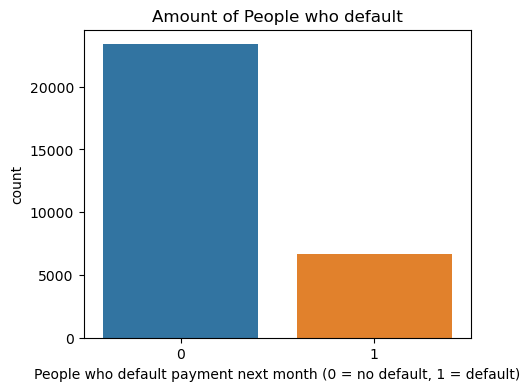

In [5]:
# Just looking at our dataset and how many people default

fig, ax = plt.subplots(figsize=(5, 4))
sns.countplot(data=df, x='default payment next month', ax=ax)
ax.set_title('Amount of People who default')
ax.set_xlabel("People who default payment next month (0 = no default, 1 = default)");

### Averaging out columns to look at data over different variables

In [6]:
warnings.filterwarnings("ignore")

averages = df[['default payment next month', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
averages['PayAvg'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)
averages['BillAvg'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
averages['PayAmtAvg'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
averages

,default payment next month,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PayAvg,BillAvg,PayAmtAvg
0,1,20000,2,2,1,24,-0.333333,1284.000000,114.833333
1,1,120000,2,2,2,26,0.500000,2846.166667,833.333333
2,0,90000,2,2,2,34,0.000000,16942.166667,1836.333333
3,0,50000,2,2,1,37,0.000000,38555.666667,1398.000000
4,0,50000,1,2,1,57,-0.333333,18223.166667,9841.500000
...,...,...,...,...,...,...,...,...,...
29995,0,220000,1,3,1,39,0.000000,120891.500000,7091.666667
29996,0,150000,1,3,2,43,-0.666667,3530.333333,2415.000000
29997,1,30000,1,2,2,37,1.333333,11749.333333,5216.666667
29998,1,80000,1,3,1,41,-0.166667,44435.166667,24530.166667


Creating the ```averages``` dataframe is just a way of making our dataframe smaller so its more clear when we look at the pairplot and when we are comparing different columns to each other, so that we may see the correlations more clearly and it doesn't take 20 minutes.

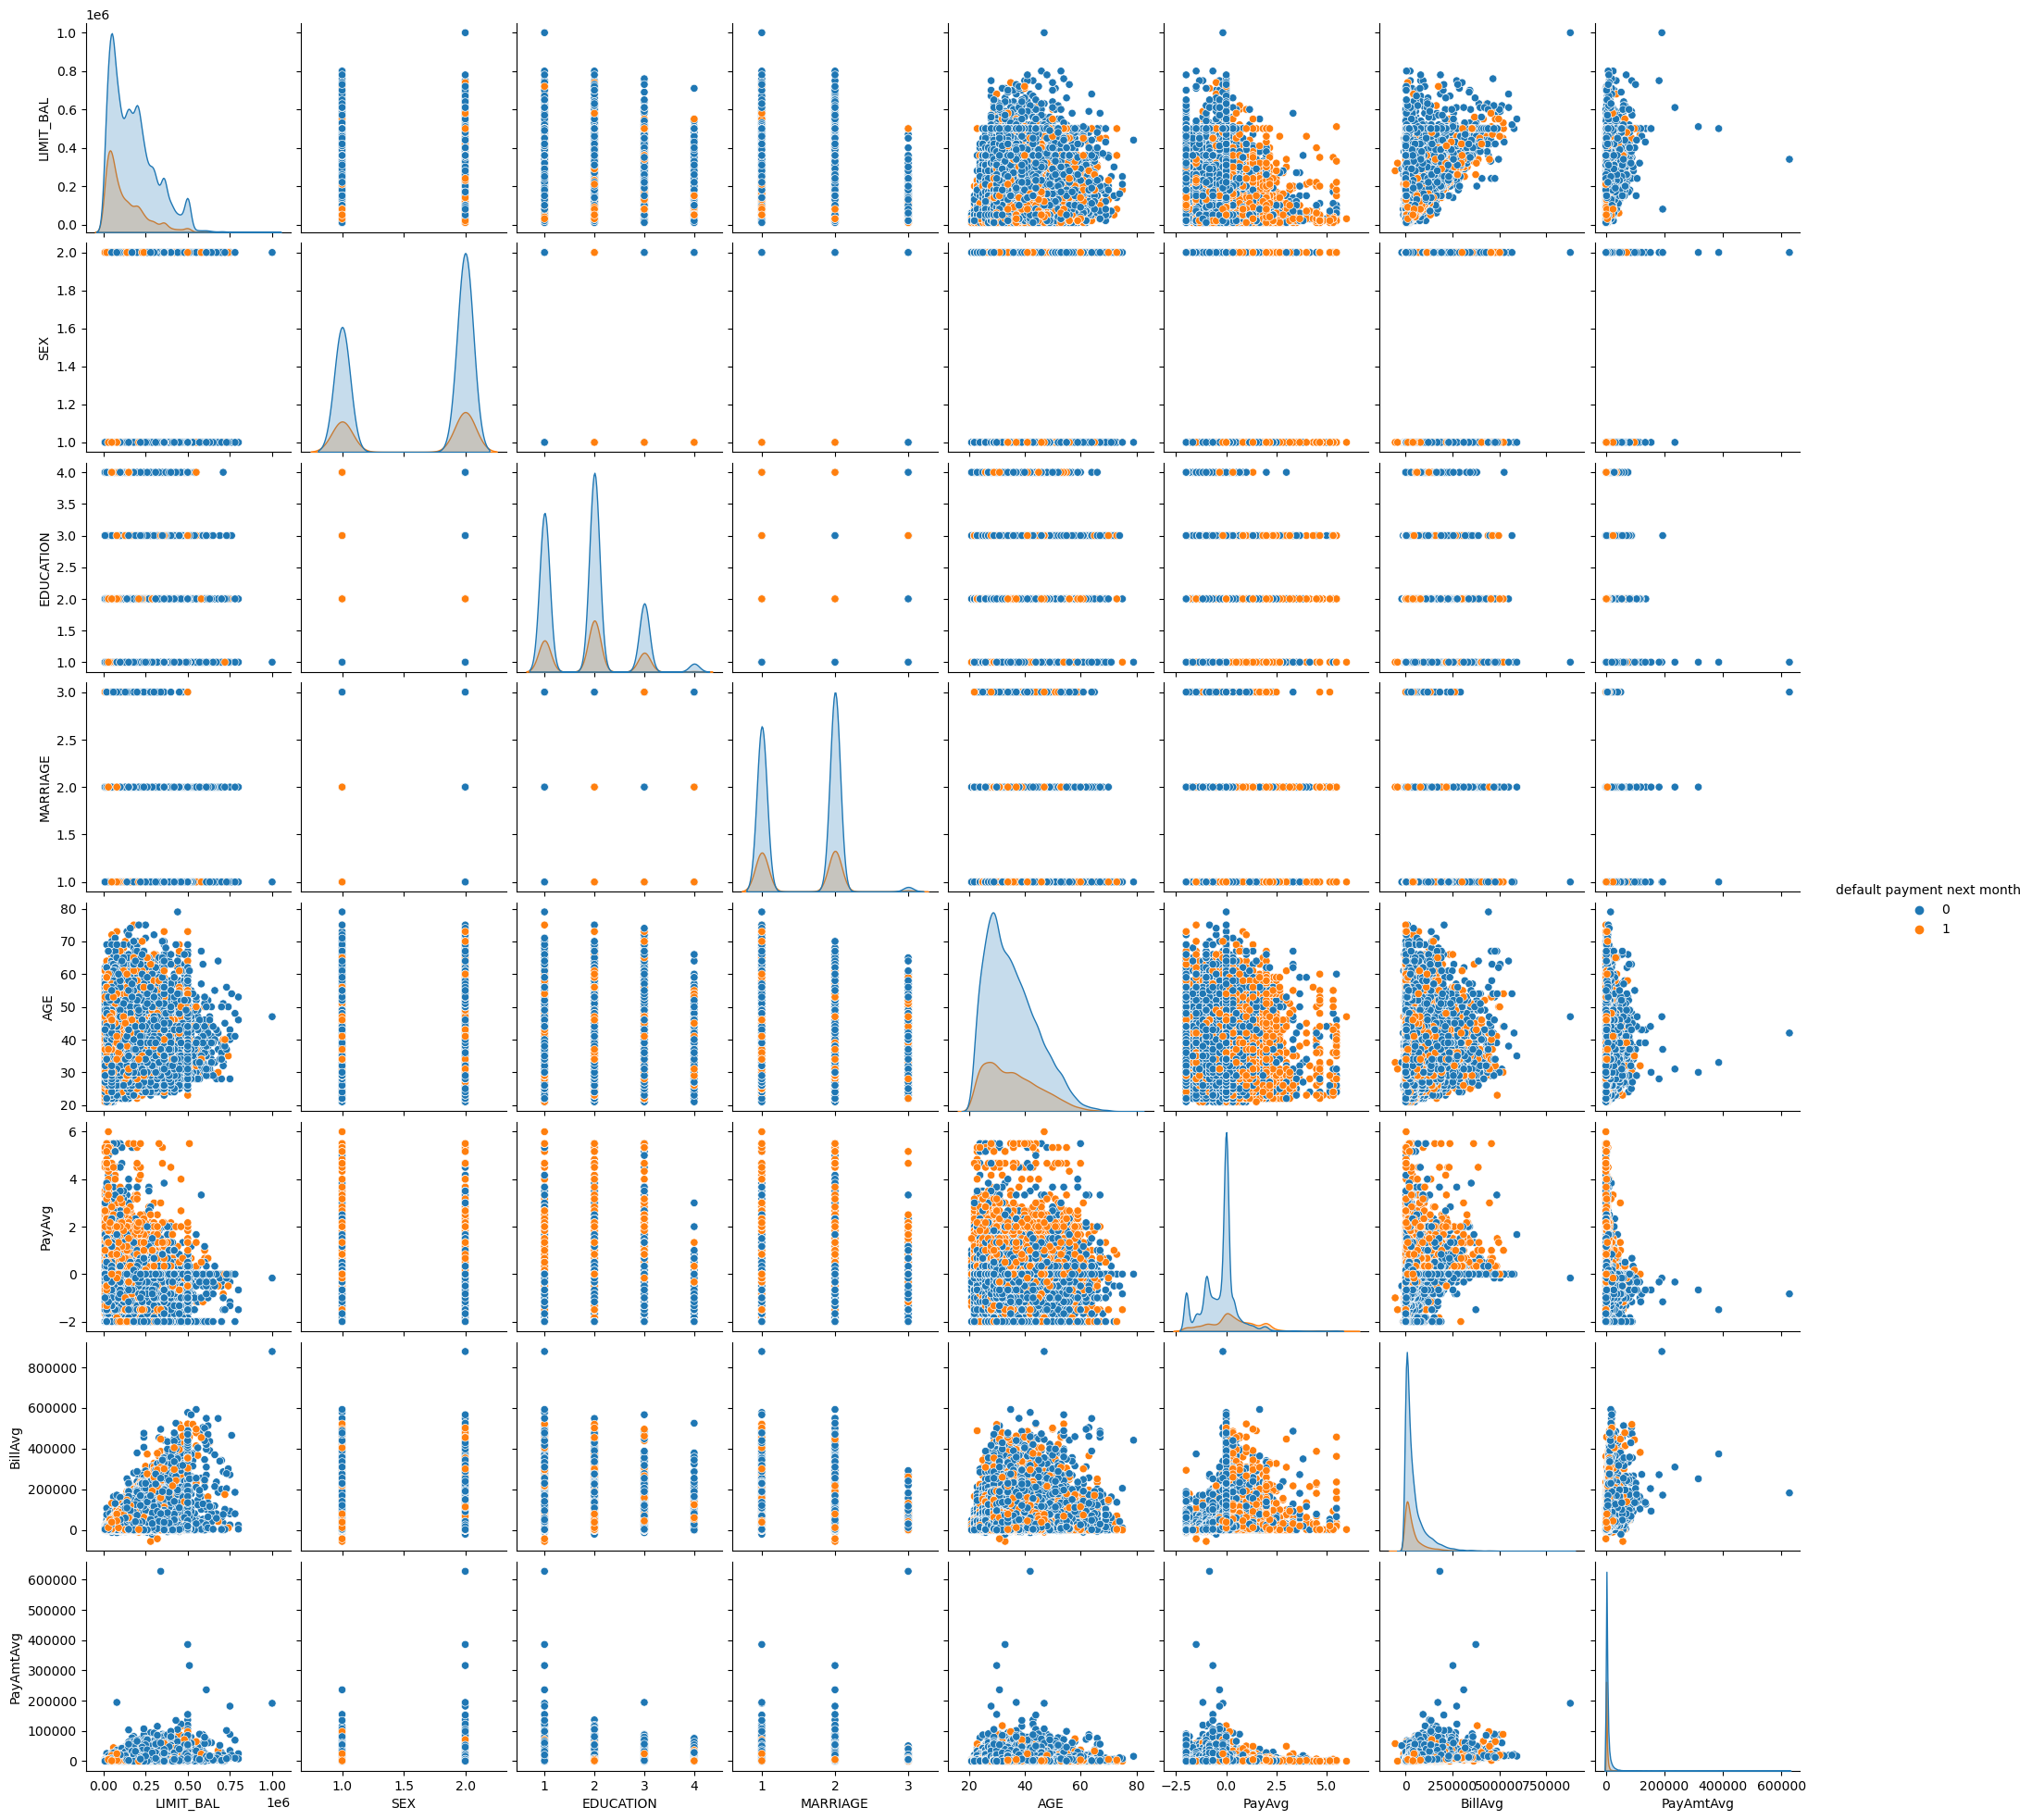

In [7]:
sns.pairplot(averages, hue='default payment next month')
plt.show()

With this dataset and the separation of blues and oranges (blues meaning the account did not default, and orange meaning the account did default), we can actually see a correlation when we look at the PayAvg column and row, where the oranges and blues are more clearly separated. As `PayAvg` increases, it means that the amount of months that takes for someone to pay back a credit card bill also increases. These graph indicate to us that there is a correlation there between the amount of months it takes someone to pay back their credit card bill and the orange dots representing whether or not the account will default.

# Results

- Cleaning Dataset
  - One hot encoding
  - Standard Scaling
  - Min-Max Scaling
- Training our Logistic Regression model
  - Training
  - Looking at Confusion Matrix and Stats
  - ROC Curve
- Training our AdaBoost model
  - Training
  - Looking at Confusion Matrix and Stats
  - ROC Curve

## Cleaning Dataset

We will begin by cleaning our dataset to make it usable and polished for when we train and test our models.
This includes doing one hot encoding for the categorical variables, standard scaling for variables that are more generally more Gaussian (or that can be adjusted to be), and min-max scaling for variables that we would rather keep the shape of, as they provide more insight in those ways.

### One Hot Encoding

In [8]:
# One-hot-encoding categorical columns
categorical = ["SEX", "EDUCATION", "MARRIAGE"]
one_hot_df = pd.get_dummies(df, columns=categorical)

one_hot_df.head(3)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default payment next month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,1,0,1,0,1,0,0,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,1,0,1,0,1,0,0,0,1,0
2,3,90000,34,0,0,0,0,0,0,29239,...,0,0,1,0,1,0,0,0,1,0


As mentioned earlier, we use one-hot encoding for the variables `Sex`, `Education`, and `Marriage` because they are categorical variables where the numerical distance between categories is not meaningful. In these cases, each category is represented as a binary feature, allowing the model to understand the presence or absence of a particular category.

However, we do not apply one-hot encoding to the variable `PAY`, even though it is also a categorical variable. The reason is that the numerical values of PAY have a specific order that carries significance. The increasing numbers in `PAY` categories indicate the payment status at different time periods. For instance, the distinction between `-1` and `9` holds actual correlation and reflects the progression of payment delays over time.

Instead of one-hot encoding, we can treat `PAY` as an ordinal variable and encode it with numerical values that preserve the order and relationship between the categories. This way, the model can capture the sequential nature of the payment status and utilize the information encoded in the numerical values of `PAY`.

### Standard Scaling

In [9]:
scaler = StandardScaler()

one_hot_df["AGE"] = scaler.fit_transform(one_hot_df[["AGE"]])

one_hot_df.head(3)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default payment next month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,-1.246020,2,2,-1,-1,-2,-2,3913,...,1,0,1,0,1,0,0,1,0,0
1,2,120000,-1.029047,-1,2,0,0,0,2,2682,...,1,0,1,0,1,0,0,0,1,0
2,3,90000,-0.161156,0,0,0,0,0,0,29239,...,0,0,1,0,1,0,0,0,1,0


Applying Standard Scaling to `Age`.

### Min Max Scaling

In [10]:
min_max_scaler = MinMaxScaler()

# Debug print out
# for i in range(7):
#     if i == 1: continue
#     print(f"PAY_{i}")
#     print(min(one_hot_df[f"PAY_{i}"].unique()), max(one_hot_df[f"PAY_{i}"].unique()))

BILL_AMT_columns = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
PAY_AMT_columns = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

one_hot_df["LIMIT_BAL"] = min_max_scaler.fit_transform(one_hot_df[["LIMIT_BAL"]])
one_hot_df[BILL_AMT_columns] = min_max_scaler.fit_transform(one_hot_df[BILL_AMT_columns])
one_hot_df[PAY_AMT_columns] = min_max_scaler.fit_transform(one_hot_df[PAY_AMT_columns])

one_hot_df.head(3)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,default payment next month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,0.010101,-1.246020,2,2,-1,-1,-2,-2,0.149982,...,1,0,1,0,1,0,0,1,0,0
1,2,0.111111,-1.029047,-1,2,0,0,0,2,0.148892,...,1,0,1,0,1,0,0,0,1,0
2,3,0.080808,-0.161156,0,0,0,0,0,0,0.172392,...,0,0,1,0,1,0,0,0,1,0


Applying Min-Max Scaling to the `LIMIT_BAL`, `BILL_AMT`, and `PAY_AMT` columns. 

In [11]:
# Dropping ID
cleaned = one_hot_df.drop("ID", axis=1)
cleaned

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default payment next month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.010101,-1.246020,2,2,-1,-1,-2,-2,0.149982,0.069164,...,1,0,1,0,1,0,0,1,0,0
1,0.111111,-1.029047,-1,2,0,0,0,2,0.148892,0.067858,...,1,0,1,0,1,0,0,0,1,0
2,0.080808,-0.161156,0,0,0,0,0,0,0.172392,0.079532,...,0,0,1,0,1,0,0,0,1,0
3,0.040404,0.164303,0,0,0,0,0,0,0.188100,0.111995,...,0,0,1,0,1,0,0,1,0,0
4,0.040404,2.334029,-1,0,-1,0,0,0,0.154144,0.071601,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.381275,0,0,0,0,0,0,0.313716,0.249208,...,0,1,0,0,0,1,0,1,0,0
29996,0.141414,0.815221,-1,-1,-1,-1,0,0,0.148008,0.067955,...,0,1,0,0,0,1,0,0,1,0
29997,0.020202,0.164303,4,3,2,-1,0,0,0.149674,0.069405,...,1,1,0,0,1,0,0,0,1,0
29998,0.070707,0.598248,1,-1,0,0,0,-1,0.145064,0.140604,...,1,1,0,0,0,1,0,1,0,0


## Logistic Regression

In [12]:
X = cleaned.drop('default payment next month', axis=1)  # assuming 'default_payment_next_month' is your target variable
y = cleaned['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = LogisticRegression(max_iter=250)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))
print("Model Score: %.2f" % model.score(X_test, y_test))

Mean squared error: 0.19
Model Score: 0.81


We initially chose logistic regression as our model of choice due to its suitability for binary classification tasks, which aligns with our dataset's nature. To begin, we utilized the `train_test_split` function to divide our dataset into training and testing sets. Our target variable was defined as `default payment next month`, representing whether a given credit card statement would default or not. Consequently, we constructed `X` to exclude the target column, and `y` to include only the target column.

Following the dataset split, we proceeded with training and testing our logistic regression model. Our analysis produced a mean squared error of `0.19` and an overall model score of `0.81`, indicating a reasonably accurate prediction capability for credit card default.

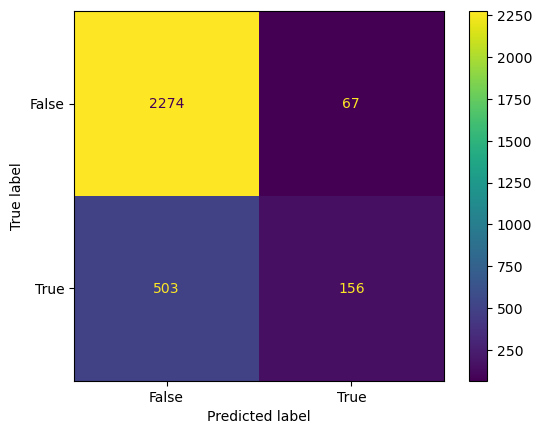

In [13]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm,display_labels = [False, True]).plot();

In [14]:
result_array = {'Accuracy': accuracy_score(y_test, y_pred), 'Precision': precision_score(y_test, y_pred), 
                'Recall/TPR': recall_score(y_test, y_pred), 'Specificity/TNR': TN/(TN+FP), 
                'False Positive Rate': FP/(TN+FP), 'F1 Score': f1_score(y_test, y_pred), 'Model': 'Logistic Regression'}
results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall/TPR', 'Specificity/TNR', 'False Positive Rate', 'F1 Score', 'Model'])
results = results.append(result_array, ignore_index=True)
results

,Accuracy,Precision,Recall/TPR,Specificity/TNR,False Positive Rate,F1 Score,Model
0,0.81,0.699552,0.236722,0.97138,0.02862,0.353741,Logistic Regression


Afterwards, we constructed a confusion matrix to gain visual insights into the performance of our model, allowing us to assess its accuracy across various factors such as accuracy, precision, recall, specificity, false positive rate (FPR), and F1 score. Overall, our Accuracy was relatively high, but it was mostly the True Negative Rate that was high at `0.97`, and our True Positive Rate that was unfornatuely lower at `0.24`. Looking at our F1 Score, which indicates a harmony between the recall and precision, we got an F1 Score of `0.35`. 

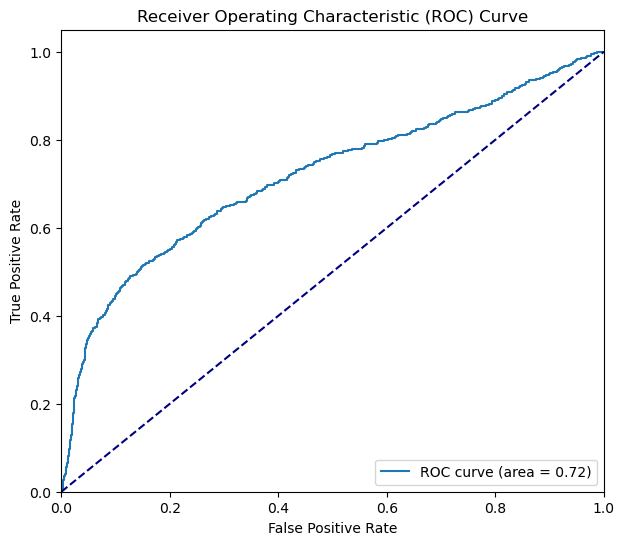

In [15]:
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The analysis of our ROC curve reveals that our model's performance is relatively okay, as the curve is positioned semi close to the dashed line, indicating that while our model is better than rnadom guessing, but also not very exceptional, with a relatively low true positive rate to false positive rate ratio. However, the Area Under the Curve (AUC) is relatively higher at `0.72`, indicating our model's trustworthy ability to discriminate between positive and negative instances. Overall, these findings demonstrate that our model is decent in identifying positive instances while minimizing false positives, instilling some confidence in its predictive capabilities for the binary classification task at hand.

## AdaBoost

In [16]:
adaboost = AdaBoostClassifier()

adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))
print("Model Score: %.2f" % model.score(X_test, y_test))

Mean squared error: 0.18
Model Score: 0.81


We selected AdaBoost as our second model to address the need for adjusting weights of weak learners and to improve the accuracy of predictions while mitigating bias and overfitting. As we had already split our data into appropriate training and testing sets, we did not require another application of `train_test_split`. We proceeded by fitting our model using the `X_train` and `y_train` datasets, enabling training and subsequent testing. The evaluation of our model yielded a mean squared error of `0.18` and a model score of `0.81`, indicating a satisfactory level of accuracy and performance.

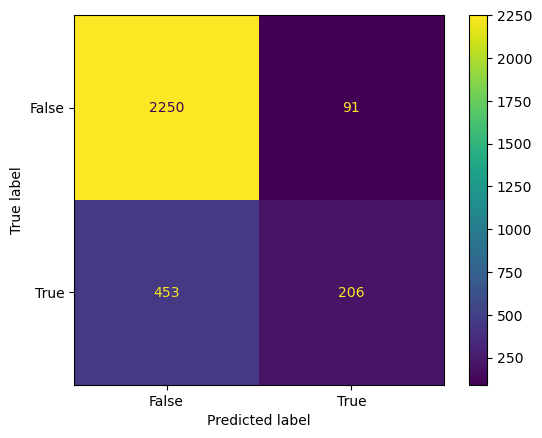

In [17]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm,display_labels = [False, True]).plot();

In [18]:
result_array = {'Accuracy': accuracy_score(y_test, y_pred), 'Precision': precision_score(y_test, y_pred), 
                'Recall/TPR': recall_score(y_test, y_pred), 'Specificity/TNR': TN/(TN+FP), 
                'False Positive Rate': FP/(TN+FP), 'F1 Score': f1_score(y_test, y_pred), 'Model': 'AdaBoost'}
results = results.append(result_array, ignore_index=True)
results = results.set_index('Model')
results

,Accuracy,Precision,Recall/TPR,Specificity/TNR,False Positive Rate,F1 Score
Model,,,,,,
Logistic Regression,0.810000,0.699552,0.236722,0.971380,0.028620,0.353741
AdaBoost,0.818667,0.693603,0.312595,0.961128,0.038872,0.430962


Looking at our confusion matrix for Adaboost, it looks rather similar to the previous confusion matrix for Logistic Regression, thus we put it on the same df so that we may compare the two models. Putting the two side by side lets us see how each of the respective categories compare to each other. For example the AdaBoost accuracy is just barely better than that of Logistic Regression, but the Recall is around 9% points better, while the False Positive Rate is around the same amount worse. Overall though, the F1 Score had also increased, putting Adaboost at around `0.43`.

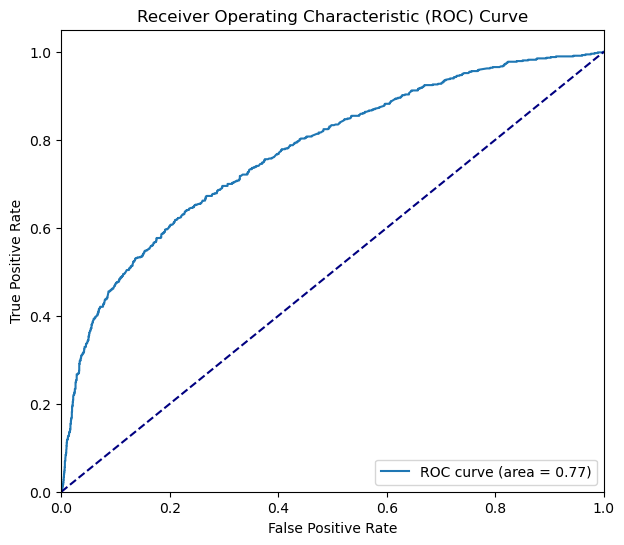

In [19]:
y_pred_proba = adaboost.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In our final ROC curve analysis for AdaBoost, we observed a similar trend to Logistic Regression, albeit with some noticeable distinctions. Compared to the Logistic Regression curve, the AdaBoost curve exhibited a greater deviation from the middle dashed line, suggesting a more favorable ratio of true positive rate (TPR) to false positive rate (FPR). Furthermore, the Area Under the Curve (AUC) for AdaBoost was higher, measuring at `0.77`. This higher AUC value signifies that AdaBoost is more reliable in accurately predicting the likelihood of credit card default. Overall, these findings emphasize the improved discriminatory power and trustworthiness of AdaBoost in discerning defaulting accounts.

# Discussion

### Interpreting the result
Overall, we found that AdaBoosting is a better model to use than Logistic Regression when looking at Credit Card Defaulting in Taiwan. Looking at the data that we obtained from both models, Adaboosting seems to be better in increasing the recall amount, meaning the amount rate of people with true positive is higher. In addition, there is a larger f1 score than the Logistic Regression model, indicating that the model is better overall as f1 checks both precision and recall, and judges it from an overall standpoint. Furthermore, there was less error in the AdaBoosting model. However, we must acknowledge that the datasets resulted in very similar results, and the False Positive Rate for AdaBoosting is higher than that of the Logistic Regression Model. While looking at models of Credit Card Defaulting, it does seem very important for us to perserve a lower False Positive Rate, that no one would be falsely charged or accused. Having a higher type-II error does not seem nearly as bad, as without the model, banks wouldn't be able to identify people at all, but to accuse an innocent person is more of a hefty error. Thankfully, both models do have a lower type-I error than type II, but AdaBoost's downside is that its false positive rate is higher. <br>
In looking at our initial graphs that we created in trying to analyze and visualze the data, we saw that there was a correlation there between the amount of months people would wait to Pay their credit card statements and whether or not they would default the next month. It was a really interesting correlation that we could have explore more as well, but unfortunately did not get around to. <br>
In looking at the two ROC curve graphs for AdaBoost and Logistic Regression, these were very interesting dataset results that show how AdaBoosting is ultimately a better model to use. The higher area under the curve sold the point as well as the bigger curve, indicating a higher true positive rate ratio to false positive rate. While the graphs were relatively tame, they were different enough to show a clear picture of how AdaBoosting was better for this dataset. Futhermore, AdaBoosting seems to be better for the dataset given how the dataset explores so many differnet types of variables, with not all of them completely relevant; thus the way that AdaBoost goes around boosting classifiers is helpful in building the model. 


### Limitations

Upon examining the evaluation metrics and ROC curve results across various models, including those beyond the two models explored in our solution, we have observed similar trends. This leads us to speculate that potential issues with our dataset handling might be a contributing factor. For instance, we could have created more relevant features by combining certain variables to better relate to the prediction task. Additionally, the nature of our dataset, with a significant number of categorical variables requiring one-hot encoding, might also be a source of the observed challenges. <br> 
Furthermore, our models got approximately the same prediction accuracy. This outcome could be attributed to inherent correlations within the variables, limitations stemming from dataset size, or the model configuration itself. To enhance our results, we can engage in more thorough feature selection methods and conduct comprehensive hyperparameter tuning to optimize the models' performance. <br>
Other limitations include looking at a dataset solely from Taiwan in 2005, with a limited number of people. While the sample size was quite large, it was representative of Taiwan in 2005 only, maybe missing certain factors that were not taken into account. Even though the study did account for a variety of factors, there could be a lot more confounding variables that lead to Credit Card defaulting that we may never see. 


### Ethics & Privacy

We acknowledge the importance of addressing data privacy and ethics concerns in our project, particularly when dealing with variables such as gender, marriage status, and age that may contain sensitive and private information. To mitigate these concerns, we are committed to ensuring that the data used in our project is completely anonymized, removing any potential identifiers that could harm or disclose the identities of individuals involved. Furthermore, we emphasize that our model will be utilized solely for research purposes and will not be employed to discriminate against any group or individual. We prioritize the ethical use of the model's outputs and intend to promote fairness, transparency, and accountability in our analysis and decision-making processes. Lastly, we will utilize tools such as 'deon' to check for data ethics issue, as tools such as these would help check for ethical guidelines and make sure there are safeguards against biases. 

### Conclusion

In the end, we have explored a couple of really interesting expirments in machine learning, that allowed us to use models such as Logistic Regression and AdaBoost in order to really analyze the struggle when it comes down to Credit Card Defaulting. Through the utilization of different data cleaning and manipulation techniques, including Z-scoring, one-hot encoding, and Min-Max scaling, we extracted meaningful insights and patterns from the dataset. The results indicated that both Logistic Regression and AdaBoost achieved a relatively high accuracy, with AdaBoost slightly outperforming logistic regression. The analysis of ROC curves and evaluation metrics such as the F1 score highlighted the models' ability to effectively discriminate between default and non-default instances. While it is important to evaluate and think about ways in which our research has been limited, which it has been, we also strive to keep Ethical concerns at the forefront and build models that hopefully can be extrapolated. Thus, future iterations or reserach in this field will hopefully keep these things in mind. Nevertheless, the application of machine learning models in credit card default prediction has the potential to enhance risk management strategies and mitigate financial losses for lenders and borrowers alike, and will only continue to grow with AI.

# Footnotes
<a name="Akinnote"></a>1.[^](#Akin): Akin, J. (1 Nov 2022) How Does Default Impact Your Credit?. *Experian*. https://www.experian.com/blogs/ask-experian/how-does-default-impact-credit/ <br>
<a name="Ouliarisnote"></a>2.[^](#Ouliaris): Ouliaris, S. (9 Dec 2021) What are Economic Models?. *International Monetary Fund*. https://www.imf.org/external/pubs/ft/fandd/2011/06/basics.html <br>
<a name="Neilsennote"></a>3.[^](#Neilsen,): Neilsen, B. (14 Jan 2022) The Lost Decade: Lessons from Japan's Real Estate Crisis. *Investopedia*. https://www.investopedia.com/articles/economics/08/japan-1990s-credit-crunch-liquidity-trap.asp <br>
<a name="CostaeSilvanote"></a>4.[^](#CostaeSilva,): Costa e Silva, E. (5 May 2020) TA logistic regression model for consumer default risk. *National Library of Medicine*. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9041570/ <br>
<a name="Sayjadahnote"></a>5.[^](#Sayjadah,): Sayjadah, Y. et al. (28 Oct 2018) Credit Card Default Prediction using Machine Learning Techniques. *IEEE Explore*. https://ieeexplore.ieee.org/document/8776802 <br>
<a name="Mahmudinote"></a>6.[^](#Mahmudi,): Mahmudi, H. et al. (15 Oct 2022) Evaluation of Gradient Boosting Algorithms on Balanced Home Credit Default Risk. *IEEE Explore*. https://ieeexplore.ieee.org/document/10041584 <br>
<a name="Guinote"></a>7.[^](#Gui): Gui, L. (2019) Application of Machine Learning Algorithms in Predicting Credit Card Default Payment. *UCLA*. https://escholarship.org/uc/item/9zg7157q#main <br>